In [ ]:
# For stock market, the relationships between rise/fall Numbers and yearly return.
  # (1) rise No.: the number of rise (positive daily return) every year.
  # (2) fall No.: the number of fall (negative daily return) every year.
  # (3) rise_fall ratio: rise No. / fall No.
  # (4) yearly return: (last day point - first day point)/first day point

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

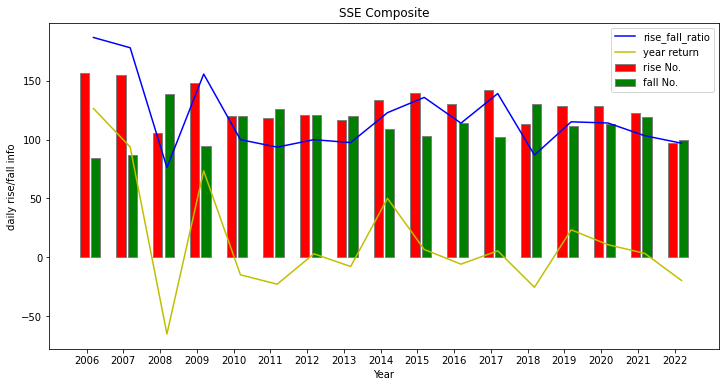

In [54]:
#!pip install yfinance # install packages
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# get data by ticker-name, start-time & end-time
def get_df_data(ticker_name="AAPL", start_time="2022-01-01", end_time="2022-10-09"):
  df_data = yf.download(tickers=ticker_name, start=start_time, end=end_time) 
  #df_data.head()
  return df_data

# calculate the daily return by (current_index - previous_index) / previous_index
def calculate_daily_return(df_data, OHLC_index="Close"):
  name1 = OHLC_index+"_previous"
  df_data[name1] = df_data[OHLC_index].shift(1)
  name2 = OHLC_index+"_delta"
  df_data[name2] = df_data[OHLC_index] - df_data[name1]
  name3 = OHLC_index+"_return"
  df_data[name3] = df_data[name2] / df_data[name1]
  del df_data[name1]
  del df_data[name2]
  new_feature = name3
  return df_data, new_feature

# get the market movement, 1 means rise and 0 fall
def get_market_movement(df_data, signal_name="Close_return"):
  df_data["movement"] = df_data[signal_name]>0
  df_data["movement"] = df_data["movement"].astype(int)
  return df_data

# get data by year with packing above functions
def get_data_by_year(ticker_name, year, close_or_volume="Close"):
  st, et = str(year)+"-01-01", str(year)+"-12-31"
  df_data = get_df_data(ticker_name, st, et)
  df_data, new_feature = calculate_daily_return(df_data, close_or_volume)
  df_data = get_market_movement(df_data, new_feature)
  return df_data

# daily rise, daily fall, rise-fall ratio
# get rise No., fall No., rise_fall ratio and yearly return each year for stock
def get_rise_fall_info(ticker_name, year, close_or_volume="Close"):
  df_data = get_data_by_year( ticker_name, year, close_or_volume )
    # year return for this stock
  year_return = (df_data["Close"][-1] - df_data["Close"][0])/df_data["Close"][0] * 100 
    # get daily rise/fall numbers, and their ratio
  rise_fall_signal = list(df_data["movement"])
  rise_signal = sum(rise_fall_signal)
  fall_signal = len(rise_fall_signal) - sum(rise_fall_signal)
  rise_fall_ratio = rise_signal/fall_signal * 100
  return rise_signal, fall_signal, rise_fall_ratio, year_return

"""
year = 2022
tn = "^IXIC"
close_or_volume = "Close" # Close, Volume
df_data = get_data_by_year( tn, year, close_or_volume )
df_data
"""

# ^IXIC, ^DJI, ^GSPC, ^HSI, 000001.SS, ^FTSE
tn = "000001.SS"
index_name = { "^GSPC":"S&P 500", "^DJI":"Dow Jones", "^IXIC":"Nasdaq", 
              "000001.SS":"SSE Composite", "^HSI":"Hang Seng",
              "^FTSE":"FTSE 100",
              "BTC-USD":"BTC-USD", "CNY=X":"USD/CNY"
        }


years = []
r_signals = []
f_signals = []
r_f_ratios = []
yr_returns = []
for i in range(2006, 2023):
  # st, et = "2022-01-01", "2022-12-31"
  which_year = i
  close_or_volume = "Close" # Close, Volume
  rise_signal, fall_signal, rise_fall_ratio, year_return = get_rise_fall_info(tn, which_year, close_or_volume)
  #print(which_year, rise_signal, fall_signal, "\t", rise_fall_ratio, year_return)
  years.append(which_year)
  r_signals.append(rise_signal)
  f_signals.append(fall_signal)
  r_f_ratios.append(rise_fall_ratio)
  yr_returns.append(year_return)


# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 6))
# Set position of bar on X axis
br0 = years
br1 = [x - barWidth/4 for x in br0]
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth/4 for x in br2]
# Make the plot
plt.xticks( years )
plt.bar(br1, r_signals, color ='r', width = barWidth, edgecolor ='grey', label ='rise No.')
plt.bar(br3, f_signals, color ='g', width = barWidth, edgecolor ='grey', label ='fall No.')
plt.plot(br2, r_f_ratios, color ='b', label ='rise_fall_ratio')
plt.plot(br2, yr_returns, color ='y', label ='year return')
#plt.bar(br3, CSE, color ='b', width = barWidth, edgecolor ='grey', label ='rise_fall_ratio')
# Adding Xticks
plt.title(index_name[tn])
plt.xlabel('Year')
plt.ylabel("daily rise/fall info")
plt.legend()
plt.show()

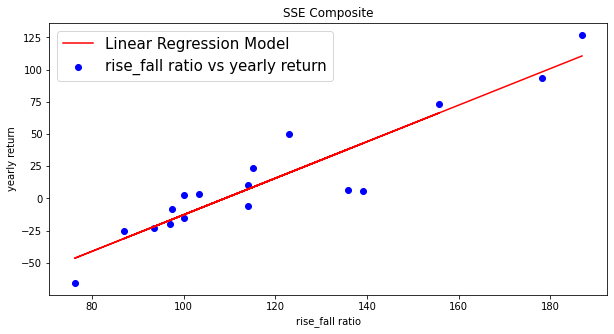

In [55]:
from sklearn.linear_model import LinearRegression
import numpy as np

def LR_model_fitting(x, y):
  X_data = np.array(x)
  y_data = np.array(y)
  X_data = X_data.reshape(-1, 1)
  y_data = y_data.reshape(-1, 1)

  reg = LinearRegression().fit(X_data, y_data)
  k, b = reg.coef_, reg.intercept_
  k, b = k.reshape(1), b.reshape(1)
  k, b = k[0], b[0]
  #print(k, b)
  x_axis = x
  z_axis = []
  for v in x_axis:
    z_axis.append( k*v+b )
  return x_axis, z_axis

x, y = r_f_ratios, yr_returns
x_axis, z_axis = LR_model_fitting(x, y)
plt.figure(figsize=(10, 5))
plt.scatter(x, y, label="rise_fall ratio vs yearly return", color='b')
plt.plot(x_axis, z_axis, label="Linear Regression Model", color='r')
plt.legend(fontsize = 15)
plt.xlabel("rise_fall ratio")
plt.ylabel("yearly return")
plt.title(index_name[tn])
plt.show()